# 1. Prediction: Dựa vào code base tạo .pkl để code UI 
# 2. Dựa vào code Pair Trading để triển UI 
# 3. Dựa vào code Reversal Trading để triển UI/ 

# 1. Dựa vào cách đóng gói .pkl để viết code dự đoán => UI dự đoán 

In [1]:
import joblib
import numpy as np
import os
import pandas as pd

def test_prediction(model_name, input_values):
    """
    Test prediction using saved model
    
    Args:
        model_name (str): Name of the stock (e.g., 'FPT', 'CMG')
        input_values (list): List of 4 features (open, high, low, volume)
    """
    try:
        # Define paths
        model_dir = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/2_code_notebooks_TrainingModel/pkl_save_model_results"
        
        # Load model and scalers
        model = joblib.load(os.path.join(model_dir, f"{model_name}_ridge_model.pkl"))
        scaler_x = joblib.load(os.path.join(model_dir, f"{model_name}_scaler_x.pkl"))
        scaler_y = joblib.load(os.path.join(model_dir, f"{model_name}_scaler_y.pkl"))
        
        # Create DataFrame with correct feature names
        feature_names = ['open', 'high', 'low', 'volume']
        input_df = pd.DataFrame([input_values], columns=feature_names)
        
        # Scale input
        scaled_input = scaler_x.transform(input_df)
        
        # Make prediction
        scaled_prediction = model.predict(scaled_input)
        
        # Inverse transform prediction
        final_prediction = scaler_y.inverse_transform(scaled_prediction.reshape(-1, 1))
        
        return final_prediction[0][0]
        
    except Exception as e:
        print(f"Error during prediction: {str(e)}")
        print(f"Expected features: {feature_names}")
        return None

# Example usage
if __name__ == "__main__":
    # Test with sample values
    model_name = "FPT"  # or "CMG", "VGI", "VTL"
    
    # Example input: [open, high, low, volume]
    sample_input = [
        85000,    # open price
        86000,    # high price
        84000,    # low price
        1000000   # volume
    ]
    
    prediction = test_prediction(model_name, sample_input)
    
    if prediction is not None:
        print(f"\nTest Prediction Results for {model_name}:")
        print("Input values:")
        print(f"Open: {sample_input[0]:,} VND")
        print(f"High: {sample_input[1]:,} VND")
        print(f"Low: {sample_input[2]:,} VND")
        print(f"Volume: {sample_input[3]:,}")
        print(f"\nPredicted close price: {prediction:,.2f} VND")


Test Prediction Results for FPT:
Input values:
Open: 85,000 VND
High: 86,000 VND
Low: 84,000 VND
Volume: 1,000,000

Predicted close price: 84,523.32 VND


- ... mong 4 tham số 

- using joblib to save the models in your training code, but trying to load them with pickle in the Streamlit app. Let's modify your Streamlit app to use joblib instead:

Tôi sẽ giải thích từng phần của giao diện UI:

1. **Input Data Section**:
```
Opening Price (VND): 85000.00  [-] [+]
Low Price (VND): 84000.00     [-] [+]
High Price (VND): 86000.00    [-] [+]
Trading Volume: 1000000       [-] [+]
```
- Cho phép nhập 4 thông số chính của cổ phiếu:
  - Giá mở cửa (Opening Price)
  - Giá thấp nhất (Low Price) 
  - Giá cao nhất (High Price)
  - Khối lượng giao dịch (Trading Volume)
- Có nút +/- để điều chỉnh giá trị

2. **Prediction Results**:
```
Predicted Closing Price: 84,523.32 VND
```
- Hiển thị giá đóng cửa dự đoán dựa trên model

3. **Analysis Section**:
```
Day's Trading Range: 2,000.00 VND
Predicted Change from Open: -476.68 VND (-0.56%)
```
- Trading Range: Khoảng dao động giá trong ngày (High - Low)
- Change from Open: Chênh lệch giữa giá dự đoán và giá mở cửa
  - Số âm (-476.68) cho thấy giá dự đoán thấp hơn giá mở cửa
  - Phần trăm (-0.56%) thể hiện mức độ giảm

4. **Price Visualization**:
- Biểu đồ cột thể hiện:
  - Low (xanh lá): Giá thấp nhất
  - Open (xanh lá): Giá mở cửa
  - Predicted Close (xanh lá): Giá đóng cửa dự đoán
  - High (đỏ): Giá cao nhất
- Màu sắc:
  - Xanh lá: Giá thấp hơn giá mở cửa
  - Đỏ: Giá cao hơn giá mở cửa

5. **Tính năng chung**:
- Có thể chọn mã cổ phiếu khác nhau (FPT, CMG, VGI, VTL)
- Tự động cập nhật khi thay đổi input
- Hiển thị kết quả trực quan qua biểu đồ
- Format số có dấu phẩy ngăn cách hàng nghìn
- Đơn vị tiền tệ VND

Giao diện này giúp người dùng:
- Dễ dàng nhập liệu
- Xem kết quả dự đoán rõ ràng
- Phân tích xu hướng giá
- So sánh trực quan các mức giá khác nhau


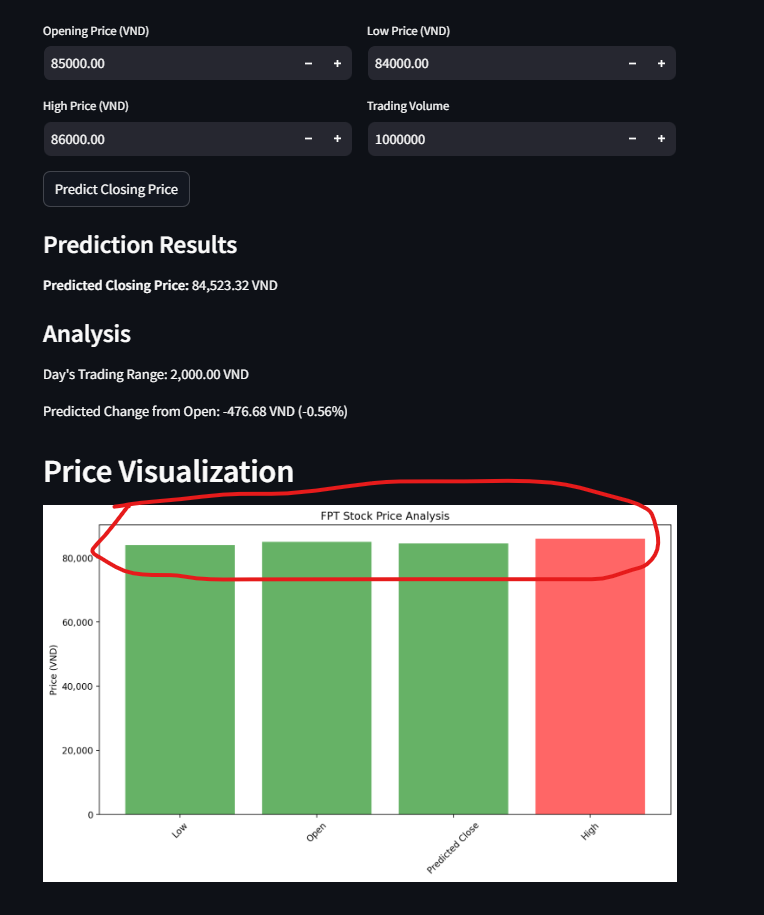

thêm chi tiết con số trên đỉnh các toà

# 2. Update Pair Trading và Reversal Trading
- Dựa vào code lúc triển khai Pair Trading và Reversal Trading để dựng code UI

Có thể triển khai thêm **Pair Trading** và **Reversal Trading** vào ứng dụng này. Dưới đây là cách bạn có thể tích hợp hai chiến lược vào giao diện hiện tại:

---

### **1. Tích Hợp Pair Trading**
Pair Trading yêu cầu tính toán **spread** giữa hai cổ phiếu. Vì vậy, bạn sẽ cần:
- Thêm chức năng để chọn hai cổ phiếu (ví dụ: FPT và CMG).
- Tính **spread** dựa trên giá dự đoán.
- Sử dụng **spread dự đoán** để đưa ra quyết định mở/đóng vị thế.

#### **Cách làm:**
- Thêm lựa chọn cho cặp cổ phiếu trong giao diện.
- Sử dụng mô hình Ridge Regression cho từng cổ phiếu để dự đoán giá đóng cửa.
- Tính toán spread và dựa vào z-score để quyết định giao dịch.

```python
def calculate_spread(stock1_pred: float, stock2_pred: float) -> float:
    return stock1_pred - stock2_pred

def pair_trading_decision(spread: float, threshold: float) -> str:
    if spread > threshold:
        return "Short Spread: Sell Stock1, Buy Stock2"
    elif spread < -threshold:
        return "Long Spread: Buy Stock1, Sell Stock2"
    else:
        return "No Action"
```

Trong `run`:
- Thêm lựa chọn cặp cổ phiếu.
- Tính spread dự đoán và hiển thị quyết định giao dịch.

---

### **2. Tích Hợp Reversal Trading**
Reversal Trading dựa vào **z-score** để phát hiện các điểm đảo chiều. Bạn cần:
- Tính **z-score** dựa trên dữ liệu giá trong quá khứ.
- Sử dụng **z-score** để mở/đóng vị thế.

#### **Cách làm:**
- Tính z-score cho cổ phiếu đã chọn.
- Quyết định mở/đóng vị thế dựa trên ngưỡng z-score.

```python
def calculate_z_score(series: pd.Series, window: int = 30) -> pd.Series:
    rolling_mean = series.rolling(window).mean()
    rolling_std = series.rolling(window).std()
    z_score = (series - rolling_mean) / rolling_std
    return z_score

def reversal_trading_decision(z_score: float, upper: float, lower: float) -> str:
    if z_score > upper:
        return "Short Position: Expect Price to Drop"
    elif z_score < lower:
        return "Long Position: Expect Price to Rise"
    else:
        return "No Action"
```

Trong `run`:
- Thêm bảng dữ liệu lịch sử để tính z-score.
- Hiển thị quyết định giao dịch dựa trên z-score.

---

### **3. Cập Nhật Giao Diện**
#### **Cấu hình sidebar**
Thêm lựa chọn chiến lược giao dịch (Pair Trading hoặc Reversal Trading):
```python
strategy = st.sidebar.radio("Select Trading Strategy", ["Pair Trading", "Reversal Trading"])
```

#### **Trong phần chính (`run`)**
Thay đổi hành động dựa trên chiến lược đã chọn:
- **Pair Trading:**
    - Chọn hai cổ phiếu.
    - Tính spread dự đoán và hiển thị quyết định.
- **Reversal Trading:**
    - Chọn một cổ phiếu.
    - Tính z-score và hiển thị quyết định giao dịch.

```python
if strategy == "Pair Trading":
    stock1, stock2 = st.sidebar.selectbox("Stock 1", model_list), st.sidebar.selectbox("Stock 2", model_list)
    if self.predictor.load_model(stock1) and self.predictor.load_model(stock2):
        pred1 = self.predictor.predict(input_features)
        pred2 = self.predictor.predict(input_features)
        spread = calculate_spread(pred1, pred2)
        decision = pair_trading_decision(spread, threshold=2.0)
        st.write(f"Spread: {spread:.2f}")
        st.write(f"Decision: {decision}")

elif strategy == "Reversal Trading":
    z_score = calculate_z_score(data['close'], window=30).iloc[-1]
    decision = reversal_trading_decision(z_score, upper=2.0, lower=-2.0)
    st.write(f"Z-score: {z_score:.2f}")
    st.write(f"Decision: {decision}")
```

---

### **4. Biểu Đồ**
Thêm biểu đồ trực quan hóa **spread** hoặc **z-score**:
```python
def plot_spread_or_zscore(series: pd.Series, title: str):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(series.index, series.values, label="Spread/Z-score", color="blue")
    ax.axhline(y=2, color="red", linestyle="--", label="Upper Threshold")
    ax.axhline(y=-2, color="green", linestyle="--", label="Lower Threshold")
    ax.legend()
    st.pyplot(fig)
```

---

### **5. Kết Quả Cuối Cùng**
- Tích hợp cả Pair Trading và Reversal Trading vào một ứng dụng.
- Dựa trên dữ liệu đầu vào, giao diện sẽ hiển thị:
  - Dự đoán giá từng cổ phiếu.
  - Spread/z-score và quyết định giao dịch.
  - Biểu đồ trực quan hóa.

Nếu bạn cần mã nguồn hoàn chỉnh hơn hoặc muốn hướng dẫn triển khai cụ thể, hãy cho tôi biết!

import pandas as pd


class PairTradingStrategy:
    def __init__(self, fpt_file_path, cmg_file_path, recent_days, strategy_params):
        """
        Initialize the trading strategy with data files, days, and strategy parameters.
        """
        self.fpt_file_path = fpt_file_path
        self.cmg_file_path = cmg_file_path
        self.recent_days = recent_days
        self.strategy_params = strategy_params
        self.data = None
        self.profits = []

    def load_data(self):
        """
        Load and preprocess the data.
        """
        # Read data
        fpt_data = pd.read_csv(self.fpt_file_path)
        cmg_data = pd.read_csv(self.cmg_file_path)

        # Process relevant columns
        processed_fpt_data = fpt_data[['time', 'close']].rename(columns={'close': 'close_FPT'})
        processed_cmg_data = cmg_data[['time', 'close']].rename(columns={'close': 'close_CMG'})

        # Convert time to datetime and sort
        processed_fpt_data['time'] = pd.to_datetime(processed_fpt_data['time'])
        processed_cmg_data['time'] = pd.to_datetime(processed_cmg_data['time'])
        processed_fpt_data.sort_values('time', inplace=True)
        processed_cmg_data.sort_values('time', inplace=True)

        # Merge datasets
        data = pd.merge(processed_fpt_data, processed_cmg_data, on='time')

        # Calculate spread and z-score
        data['spread'] = data['close_FPT'] - data['close_CMG']
        data['mean_spread'] = data['spread'].rolling(window=30).mean()
        data['std_spread'] = data['spread'].rolling(window=30).std()
        data['z_score'] = (data['spread'] - data['mean_spread']) / data['std_spread']

        # Filter recent days
        self.data = data.tail(self.recent_days)

    def execute_strategy(self, strategy_name):
        """
        Execute a trading strategy.
        """
        position = 0  # 0: No position, 1: Long Spread, -1: Short Spread
        entry_price_fpt = 0
        entry_price_cmg = 0
        self.profits = []  # Reset profits for each strategy

        print(f"\nExecuting {strategy_name} on last {self.recent_days} days...\n")
        params = self.strategy_params[strategy_name]

        for index, row in self.data.iterrows():
            z = row['z_score']

            # Open position
            if position == 0:
                if z > params['z_open_threshold']:
                    position = -1
                    entry_price_fpt = row['close_FPT']
                    entry_price_cmg = row['close_CMG']
                    print(f"{row['time']} - Open Short Spread: Sell FPT {entry_price_fpt}, Buy CMG {entry_price_cmg}. Reason: z_score ({z:.2f}) > {params['z_open_threshold']}.")
                elif z < -params['z_open_threshold']:
                    position = 1
                    entry_price_fpt = row['close_FPT']
                    entry_price_cmg = row['close_CMG']
                    print(f"{row['time']} - Open Long Spread: Buy FPT {entry_price_fpt}, Sell CMG {entry_price_cmg}. Reason: z_score ({z:.2f}) < {-params['z_open_threshold']}.")

            # Close position
            elif position == 1:  # Long Spread
                current_profit = (row['close_FPT'] - entry_price_fpt) * 1000 - (row['close_CMG'] - entry_price_cmg) * 1000
                if z >= params['z_close_threshold'] or current_profit >= params['profit_target'] or current_profit <= params['loss_limit']:
                    reason = self.get_close_reason(z, current_profit, params)
                    print(f"{row['time']} - Close Long Spread: Sell FPT {row['close_FPT']}, Buy CMG {row['close_CMG']}. Profit: {current_profit:.2f} VND. Reason: {reason}")
                    self.profits.append(current_profit)
                    position = 0

            elif position == -1:  # Short Spread
                current_profit = (entry_price_fpt - row['close_FPT']) * 1000 + (entry_price_cmg - row['close_CMG']) * 1000
                if z <= -params['z_close_threshold'] or current_profit >= params['profit_target'] or current_profit <= params['loss_limit']:
                    reason = self.get_close_reason(z, current_profit, params)
                    print(f"{row['time']} - Close Short Spread: Buy FPT {row['close_FPT']}, Sell CMG {row['close_CMG']}. Profit: {current_profit:.2f} VND. Reason: {reason}")
                    self.profits.append(current_profit)
                    position = 0

        total_profit = sum(self.profits)
        print(f"\nResults for {strategy_name}:")
        print(f"Number of Trades: {len(self.profits)}")
        print(f"Total Profit: {total_profit:.2f} VND\n")

    @staticmethod
    def get_close_reason(z, profit, params):
        """
        Determine the reason for closing the position.
        """
        if z >= params['z_close_threshold']:
            return f"z_score ({z:.2f}) >= {params['z_close_threshold']}."
        elif z <= -params['z_close_threshold']:
            return f"z_score ({z:.2f}) <= {-params['z_close_threshold']}."
        elif profit >= params['profit_target']:
            return f"Reached profit target ({params['profit_target']} VND)."
        elif profit <= params['loss_limit']:
            return f"Hit loss limit ({params['loss_limit']} VND)."
        return "Other condition."

# File paths
fpt_file_path = 'D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/FPT_stock_data.csv'
cmg_file_path = 'D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/CMG_stock_data.csv'

# Strategy parameters
strategy_params = {
    "strategy_1": {
        "z_open_threshold": 2.0,  # Ngưỡng mở vị thế
        "z_close_threshold": 0.0,  # Ngưỡng đóng vị thế
        "profit_target": float('inf'),  # Không chốt lời
        "loss_limit": float('-inf'),  # Không cắt lỗ
    },
    "strategy_2": {
        "z_open_threshold": 2.5,
        "z_close_threshold": 0.5,
        "profit_target": 5000000,
        "loss_limit": -3000000,
    }
}


# Initialize strategy tester
recent_days = 600  # Change to 100 or 1000 as needed
tester = PairTradingStrategy(fpt_file_path, cmg_file_path, recent_days, strategy_params)

# Run tests
tester.load_data()
tester.execute_strategy("strategy_1")
tester.execute_strategy("strategy_2")



Dựa vào đây thiết kế chiến lược code cho phần UI của Pair trading

## Data Loader
- Dựa vào code Data Loader để load dữ liệu



```
NameError: name 'load_historical_data' is not defined
Traceback:
File "D:\OneDrive - Hanoi University of Science and Technology\GIT\MiniProj_StockPrediction_ML_SpManhGraduationProj_2024\5_ui\.venv\Lib\site-packages\streamlit\runtime\scriptrunner\exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
             ^^^^^^
File "D:\OneDrive - Hanoi University of Science and Technology\GIT\MiniProj_StockPrediction_ML_SpManhGraduationProj_2024\5_ui\.venv\Lib\site-packages\streamlit\runtime\scriptrunner\script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
File "D:\OneDrive - Hanoi University of Science and Technology\GIT\MiniProj_StockPrediction_ML_SpManhGraduationProj_2024\5_ui\app\app.py", line 8, in <module>
    main()
File "D:\OneDrive - Hanoi University of Science and Technology\GIT\MiniProj_StockPrediction_ML_SpManhGraduationProj_2024\5_ui\app\app.py", line 5, in main
    app.run()
File "D:\OneDrive - Hanoi University of Science and Technology\GIT\MiniProj_StockPrediction_ML_SpManhGraduationProj_2024\5_ui\app\views.py", line 37, in run
    self.run_pair_trading()
File "D:\OneDrive - Hanoi University of Science and Technology\GIT\MiniProj_StockPrediction_ML_SpManhGraduationProj_2024\5_ui\app\views.py", line 90, in run_pair_trading
    stock1_data = load_historical_data(stock1)  # Implement this
                  ^^^^^^^^^^^^^^^^^^^^

import pandas as pd

# Load dữ liệu từ các file được tải lên
fpt_file_path = 'D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/FPT_stock_data.csv'
cmg_file_path = 'D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024/CMG_stock_data.csv'

# Đọc dữ liệu FPT và CMG
fpt_data = pd.read_csv(fpt_file_path)
cmg_data = pd.read_csv(cmg_file_path)

# Hiển thị dữ liệu mẫu
fpt_data.head(), cmg_data.head()



# Lấy cột 'time' và 'close', đổi tên cột 'close' để tránh nhầm lẫn
processed_fpt_data = fpt_data[['time', 'close']].rename(columns={'close': 'close_FPT'})
processed_cmg_data = cmg_data[['time', 'close']].rename(columns={'close': 'close_CMG'})

# Định dạng cột 'time' và sắp xếp theo ngày
processed_fpt_data['time'] = pd.to_datetime(processed_fpt_data['time'])
processed_cmg_data['time'] = pd.to_datetime(processed_cmg_data['time'])
processed_fpt_data.sort_values('time', inplace=True)
processed_cmg_data.sort_values('time', inplace=True)

# Kết hợp dữ liệu theo cột 'time'
data = pd.merge(processed_fpt_data, processed_cmg_data, on='time')

# Tính spread và các thông số khác
data['spread'] = data['close_FPT'] - data['close_CMG']
data['mean_spread'] = data['spread'].rolling(window=30).mean()
data['std_spread'] = data['spread'].rolling(window=30).std()
data['z_score'] = (data['spread'] - data['mean_spread']) / data['std_spread']

# Lấy 100 ngày gần nhất
recent_data = data.tail(100)

# Hiển thị dữ liệu mẫu
recent_data


# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Display the full dataset
print("\nFull dataset:")
print(recent_data.to_string())

# Optional: Reset display options to default after printing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')


========Fix bug 
```

Thêm file data_loader.py
```
import pandas as pd
import os

class StockDataLoader:
    def __init__(self):
        self.base_path = "D:/OneDrive - Hanoi University of Science and Technology/GIT/MiniProj_StockPrediction_ML_SpManhGraduationProj_2024/data/raw20192024"
        self.data_cache = {}

    def load_historical_data(self, stock_code: str) -> pd.DataFrame:
        """Load historical data for a given stock"""
        if stock_code in self.data_cache:
            return self.data_cache[stock_code]

        file_path = os.path.join(self.base_path, f"{stock_code}_stock_data.csv")
        
        try:
            # Read and process data
            data = pd.read_csv(file_path)
            data['time'] = pd.to_datetime(data['time'])
            data.sort_values('time', inplace=True)
            
            # Cache the data
            self.data_cache[stock_code] = data
            
            return data
        except Exception as e:
            raise Exception(f"Error loading data for {stock_code}: {str(e)}")

    def get_recent_data(self, stock_code: str, days: int = 100) -> pd.DataFrame:
        """Get recent days of data for a stock"""
        data = self.load_historical_data(stock_code)
        return data.tail(days)

## 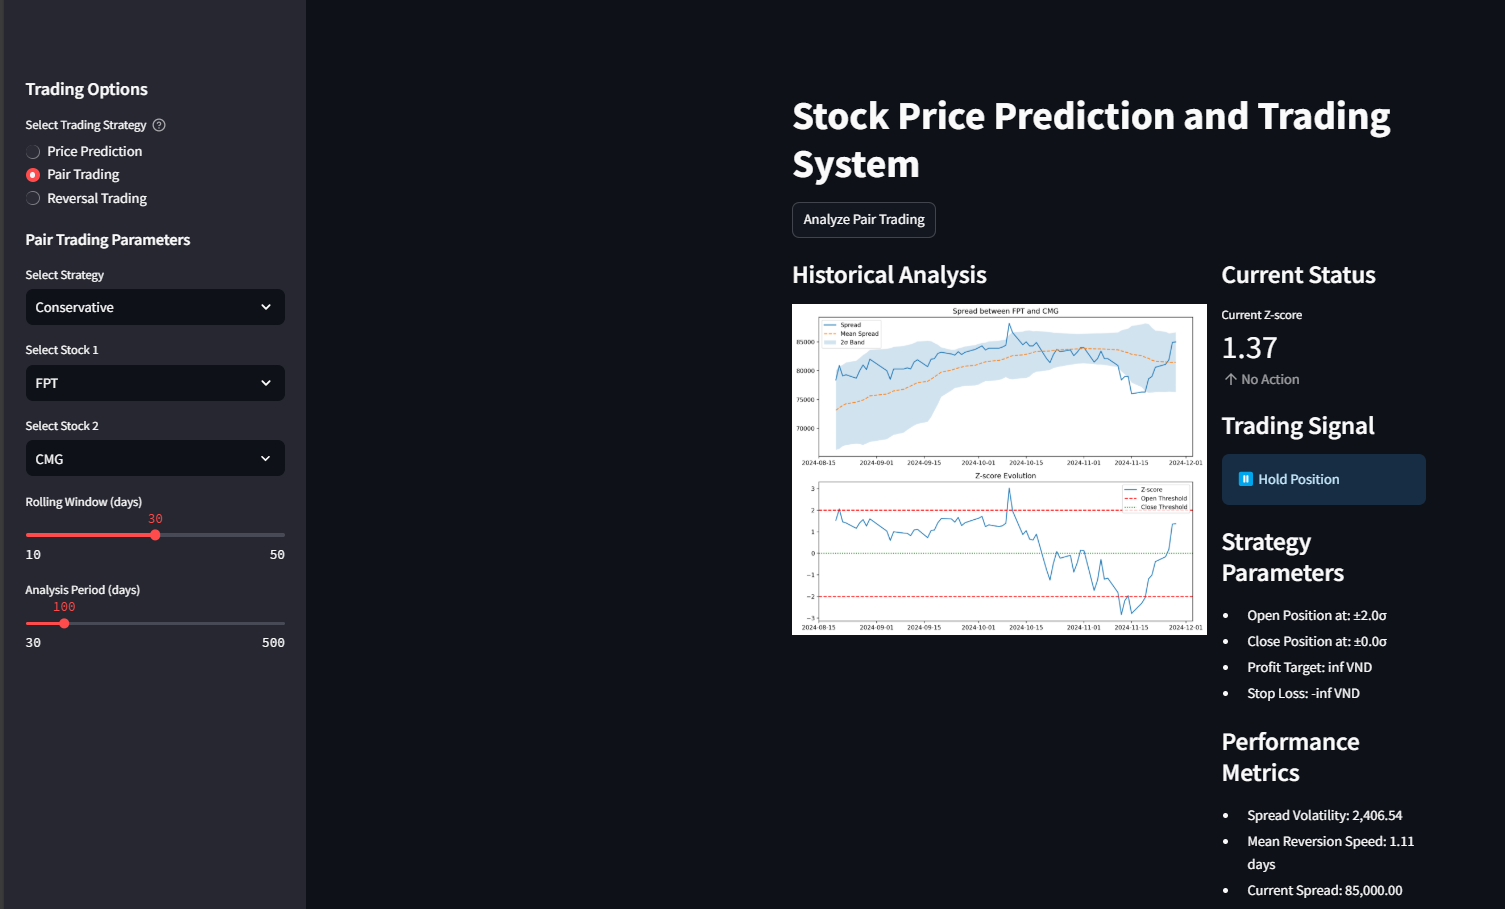

tôi các thông số trên giao diện về tiếng việt @trading_strategy.py 
và thêm các phần chú thích về các chỉ số trên UI luôn 

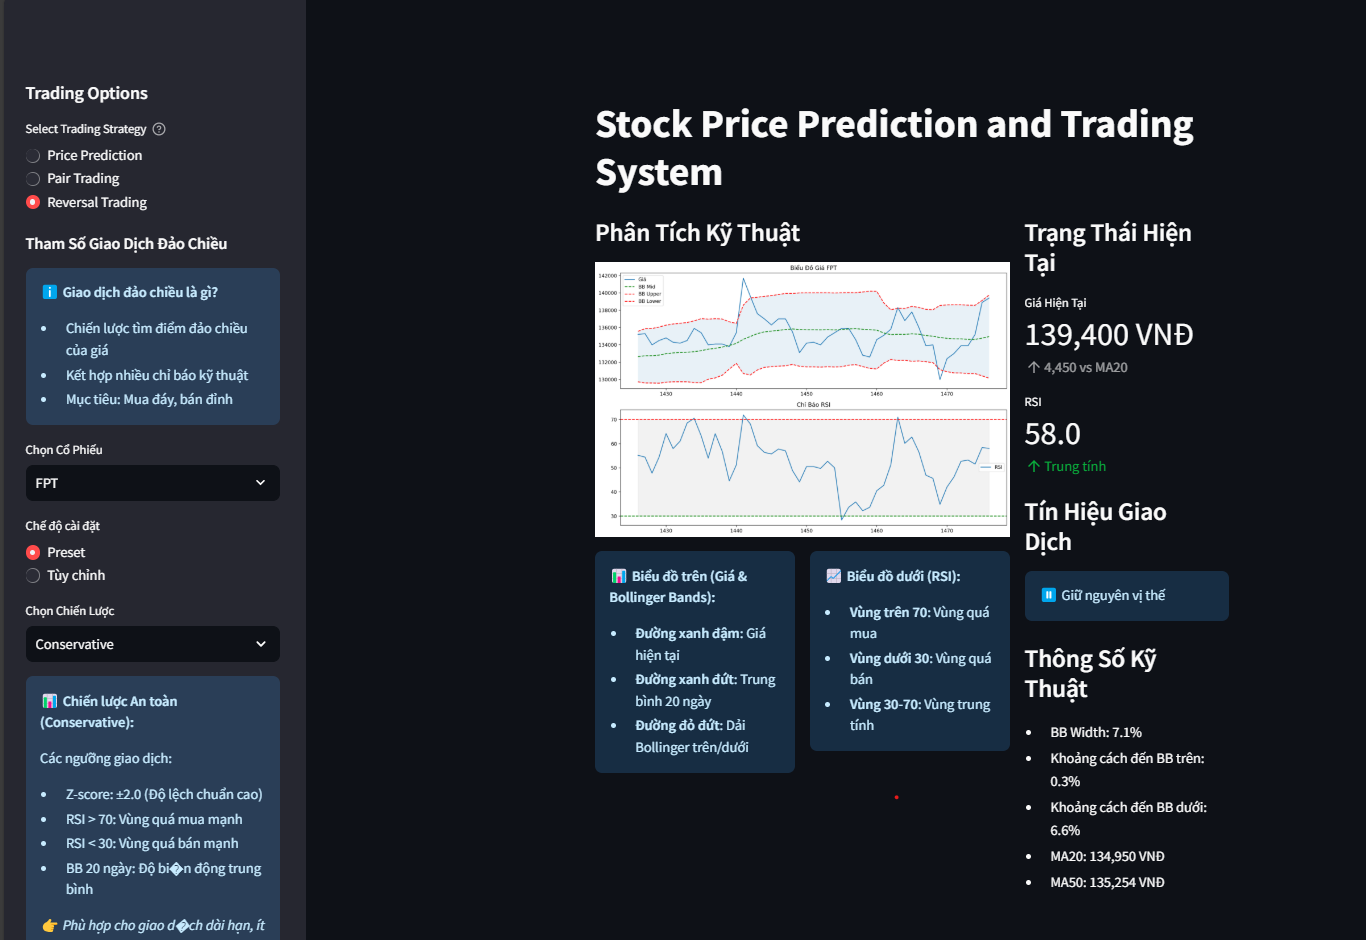